In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv",delimiter = ';',na_values = ['?',' '])
df1 = pd.read_csv("test.csv",delimiter = ';',na_values = ['?',' '])

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
df1.shape

(4521, 17)

In [9]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Detailed EDA to obtain actionable insights for various features.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Correlation

In [14]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot: >

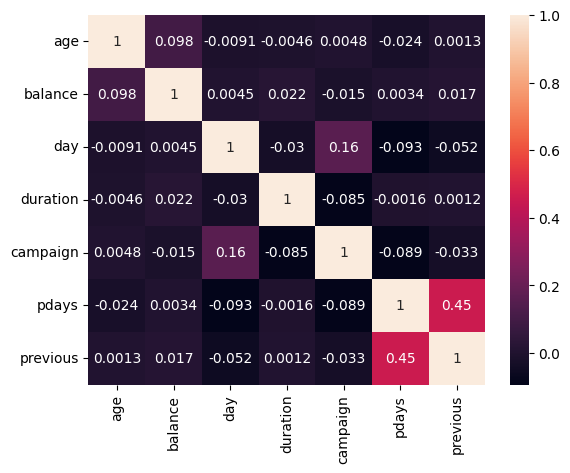

In [15]:
sns.heatmap(df.corr(),annot = True)


In [16]:
# Is the data balanced
df['y'].value_counts()
# The data is not balanced 

no     39922
yes     5289
Name: y, dtype: int64

In [17]:
df['y'] = np.where(df['y'] == 'yes',1,0)
df1['y'] = np.where(df1['y'] == 'yes',1,0)

In [18]:
df = df.rename(columns = {'y':'Target'})
df1 = df1.rename(columns = {'y':'Target'})

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

# UNIVARIATE ANALYSIS

In [20]:
# Based on profession
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

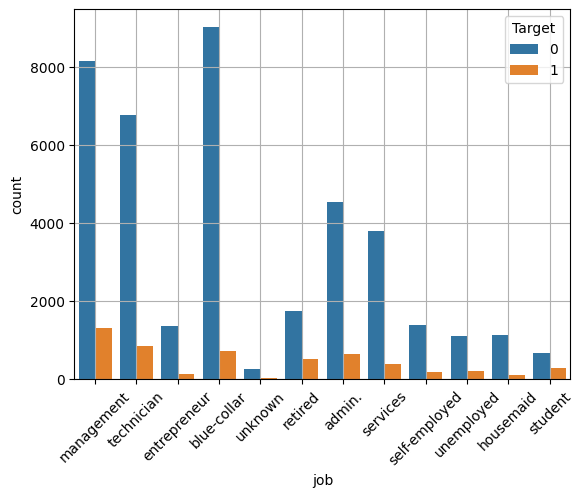

In [21]:
sns.countplot(data = df,x = 'job',hue = 'Target')
plt.xticks(rotation = 45);
plt.grid(True)
# This chart shows which type of customer is highly tend to deposit,Here the blue-collar profession customers are high in subscibed to deposit

In [22]:
# Based on marital Status
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

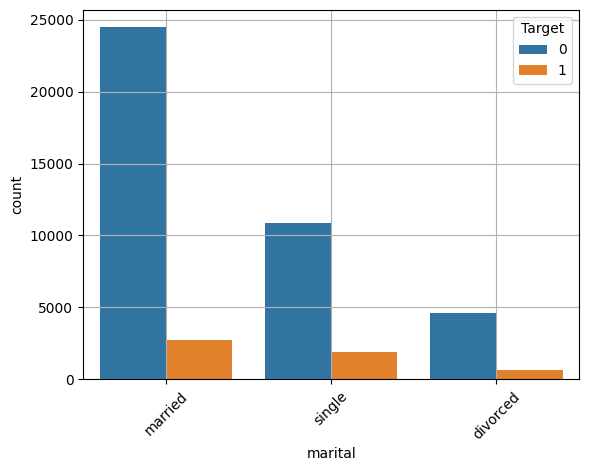

In [23]:
sns.countplot(data = df,x = 'marital',hue = 'Target')
plt.xticks(rotation = 45);
plt.grid(True)
# This chart shows which type of customer is highly tend to deposit,Here the married customers are high in subscibed to deposit

In [24]:
# Based on Education
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

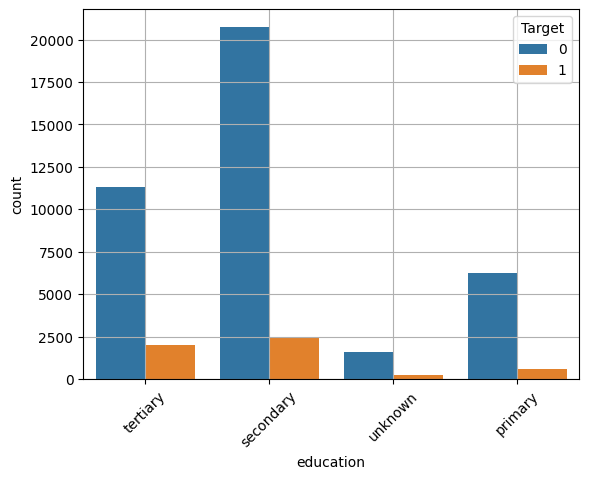

In [25]:
sns.countplot(data = df,x = 'education',hue = 'Target')
plt.xticks(rotation = 45);
plt.grid(True)
# This chart shows which type of customer is highly tend to deposit,Here the secondary educated customers are high in subscibed to deposit

# PREPROCESSING THE DATA

# Performing Feature engineering and feature selection to reduce the noise from the data and prepare the data for data modeling

In [26]:
# This dataset having both categorical and continous columns,so we have to pick best columns for both categorical and continous
# For continous columns we can go by correlation method
# For categorical columns we can go by IV method and selection based on IV Score.

# Correlation Method (By VIF (Multicollinearity))

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
col_list = []
for i in df.columns:
    if (df[i].dtypes != object) & (i != 'Target'):
        col_list.append(i)

In [29]:
col_list

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [30]:
a = df[col_list]

In [31]:
vif_data = pd.DataFrame(columns = ['Feature','VIF'])
vif_data['Feature'] = col_list
vif_data['VIF'] = [variance_inflation_factor(a.values,i) for i in range(len(a.columns))]

In [32]:
vif_data

,Feature,VIF
0,age,5.004058
1,balance,1.212908
2,day,3.984268
3,duration,1.901309
4,campaign,1.824694
5,pdays,1.454202
6,previous,1.341641


In [33]:
# Here all continous feature vif _data is < 5, So we don't want to remove Features

# IV Method

In [34]:
list = []
def iv_score(data,feature,Target):
    for i in range(data[feature].nunique()):
        val = data[feature].unique()[i]
        good = data[(data[feature] == val)&(data[Target] == 1)].count()[feature]
        bad = data[(data[feature] == val)&(data[Target] == 0)].count()[feature]
        
        list.append({'val':val,'Good':good,'Bad':bad})
        
    dset = pd.DataFrame(list)
    
    dset['Dist_Good'] = dset['Good']/dset['Good'].sum()
    dset['Dist_Bad'] = dset['Bad']/dset['Bad'].sum()
    dset['WOE'] = np.log(dset['Dist_Good']/dset['Dist_Bad'])
    dset = dset.replace({'WOE':{-np.inf:0,np.inf:0}})
    dset['IV'] = (dset['Dist_Good'] - dset['Dist_Bad']) * dset['WOE']
    IV_Score = dset['IV'].sum()
    dset = dset.sort_values(by = "WOE")
    
    return IV_Score
    

In [35]:
iv_dset =[]
for a in df.columns:
    if (df[a].dtypes == object)&(a!='Target'):
        IV = iv_score(df,a,'Target')
        iv_dset.append({'Feature':a,'IV_SCORE':IV})
        
iv_dset        

frame = pd.DataFrame(iv_dset)
frame

,Feature,IV_SCORE
0,job,0.155697
1,marital,0.097912
2,education,0.081979
3,default,0.063048
4,housing,0.088175
5,loan,0.082622
6,contact,0.113733
7,month,0.154032
8,poutcome,0.194097


In [36]:
# IV_Score = ({'<0.02':'useless','0.02-0.1':'weak_predictor','0.1-0.3':'medium_predictor','0.3-0.5':'strong_predictor','>0.5':'suspecious'})

# So we can consider between 0.1-0.5

# Based on that we can neglect marital,education,defaault,housing,loan

df.columns

b = ['age', 'job','balance','contact','day','month','duration','campaign','pdays','previous','poutcome','Target']
df_new = df[b]

df_new.head()

df1_new = df1[b]


# From our Analysis we reduced the noise or weak predictor columns 
df1_new.head()

,age,job,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,unemployed,1787,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,4789,cellular,11,may,220,1,339,4,failure,0
2,35,management,1350,cellular,16,apr,185,1,330,1,failure,0
3,30,management,1476,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,0,unknown,5,may,226,1,-1,0,unknown,0


# LABEL ENCODER

In [37]:
label = LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes == object:
        df_new[i] = label.fit_transform(df_new[i])
        
for i in df1_new.columns:
    if df1_new[i].dtypes == object:
        df1_new[i] = label.fit_transform(df1_new[i])

In [38]:
df_new.head()

,age,job,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,2143,2,5,8,261,1,-1,0,3,0
1,44,9,29,2,5,8,151,1,-1,0,3,0
2,33,2,2,2,5,8,76,1,-1,0,3,0
3,47,1,1506,2,5,8,92,1,-1,0,3,0
4,33,11,1,2,5,8,198,1,-1,0,3,0


In [39]:
df1_new.head()

,age,job,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,10,1787,0,19,10,79,1,-1,0,3,0
1,33,7,4789,0,11,8,220,1,339,4,0,0
2,35,4,1350,0,16,0,185,1,330,1,0,0
3,30,4,1476,2,3,6,199,4,-1,0,3,0
4,59,1,0,2,5,8,226,1,-1,0,3,0


# CLASSIFICATION MODEL

# Splitting the Data

In [40]:
x_train = df_new.iloc[:,0:11]
y_train = df_new[['Target']]

x1_test = df1_new.iloc[:,0:11]
y1_test = df1_new[['Target']]


# LOGISTIC REGRESSION

In [41]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [42]:
pred = model1.predict(x_train)
pred1 = model1.predict(x1_test)

In [65]:
print('Train accuracy : ',accuracy_score(y_train,pred))
print('Test accuracy : ',accuracy_score(y1_test,pred1))

Train accuracy :  0.8860233129105749
Test accuracy :  0.8869719088697191


# DECISION TREE

In [44]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
pred2 = model2.predict(x_train)
pred3 = model2.predict(x1_test)

In [46]:
print(accuracy_score(y_train,pred2))
print(accuracy_score(y1_test,pred3))

1.0
1.0


In [47]:
# Here we can see that both train and test predictions are giving 100% accuracy
# So we can conclude that the tree getting overfitted,to avoid that we can move to pruning 
# There are two types of Pruning
# Pre pruning and Post pruning,In that Pre pruning is best

model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
pred2 = model2.predict(x_train)
pred3 = model2.predict(x1_test)

In [66]:
print('Train accuracy : ',accuracy_score(y_train,pred2))
print('Test accuracy : ',accuracy_score(y1_test,pred3))

Train accuracy :  0.8894295636017784
Test accuracy :  0.8898473788984738


In [50]:
from sklearn import tree

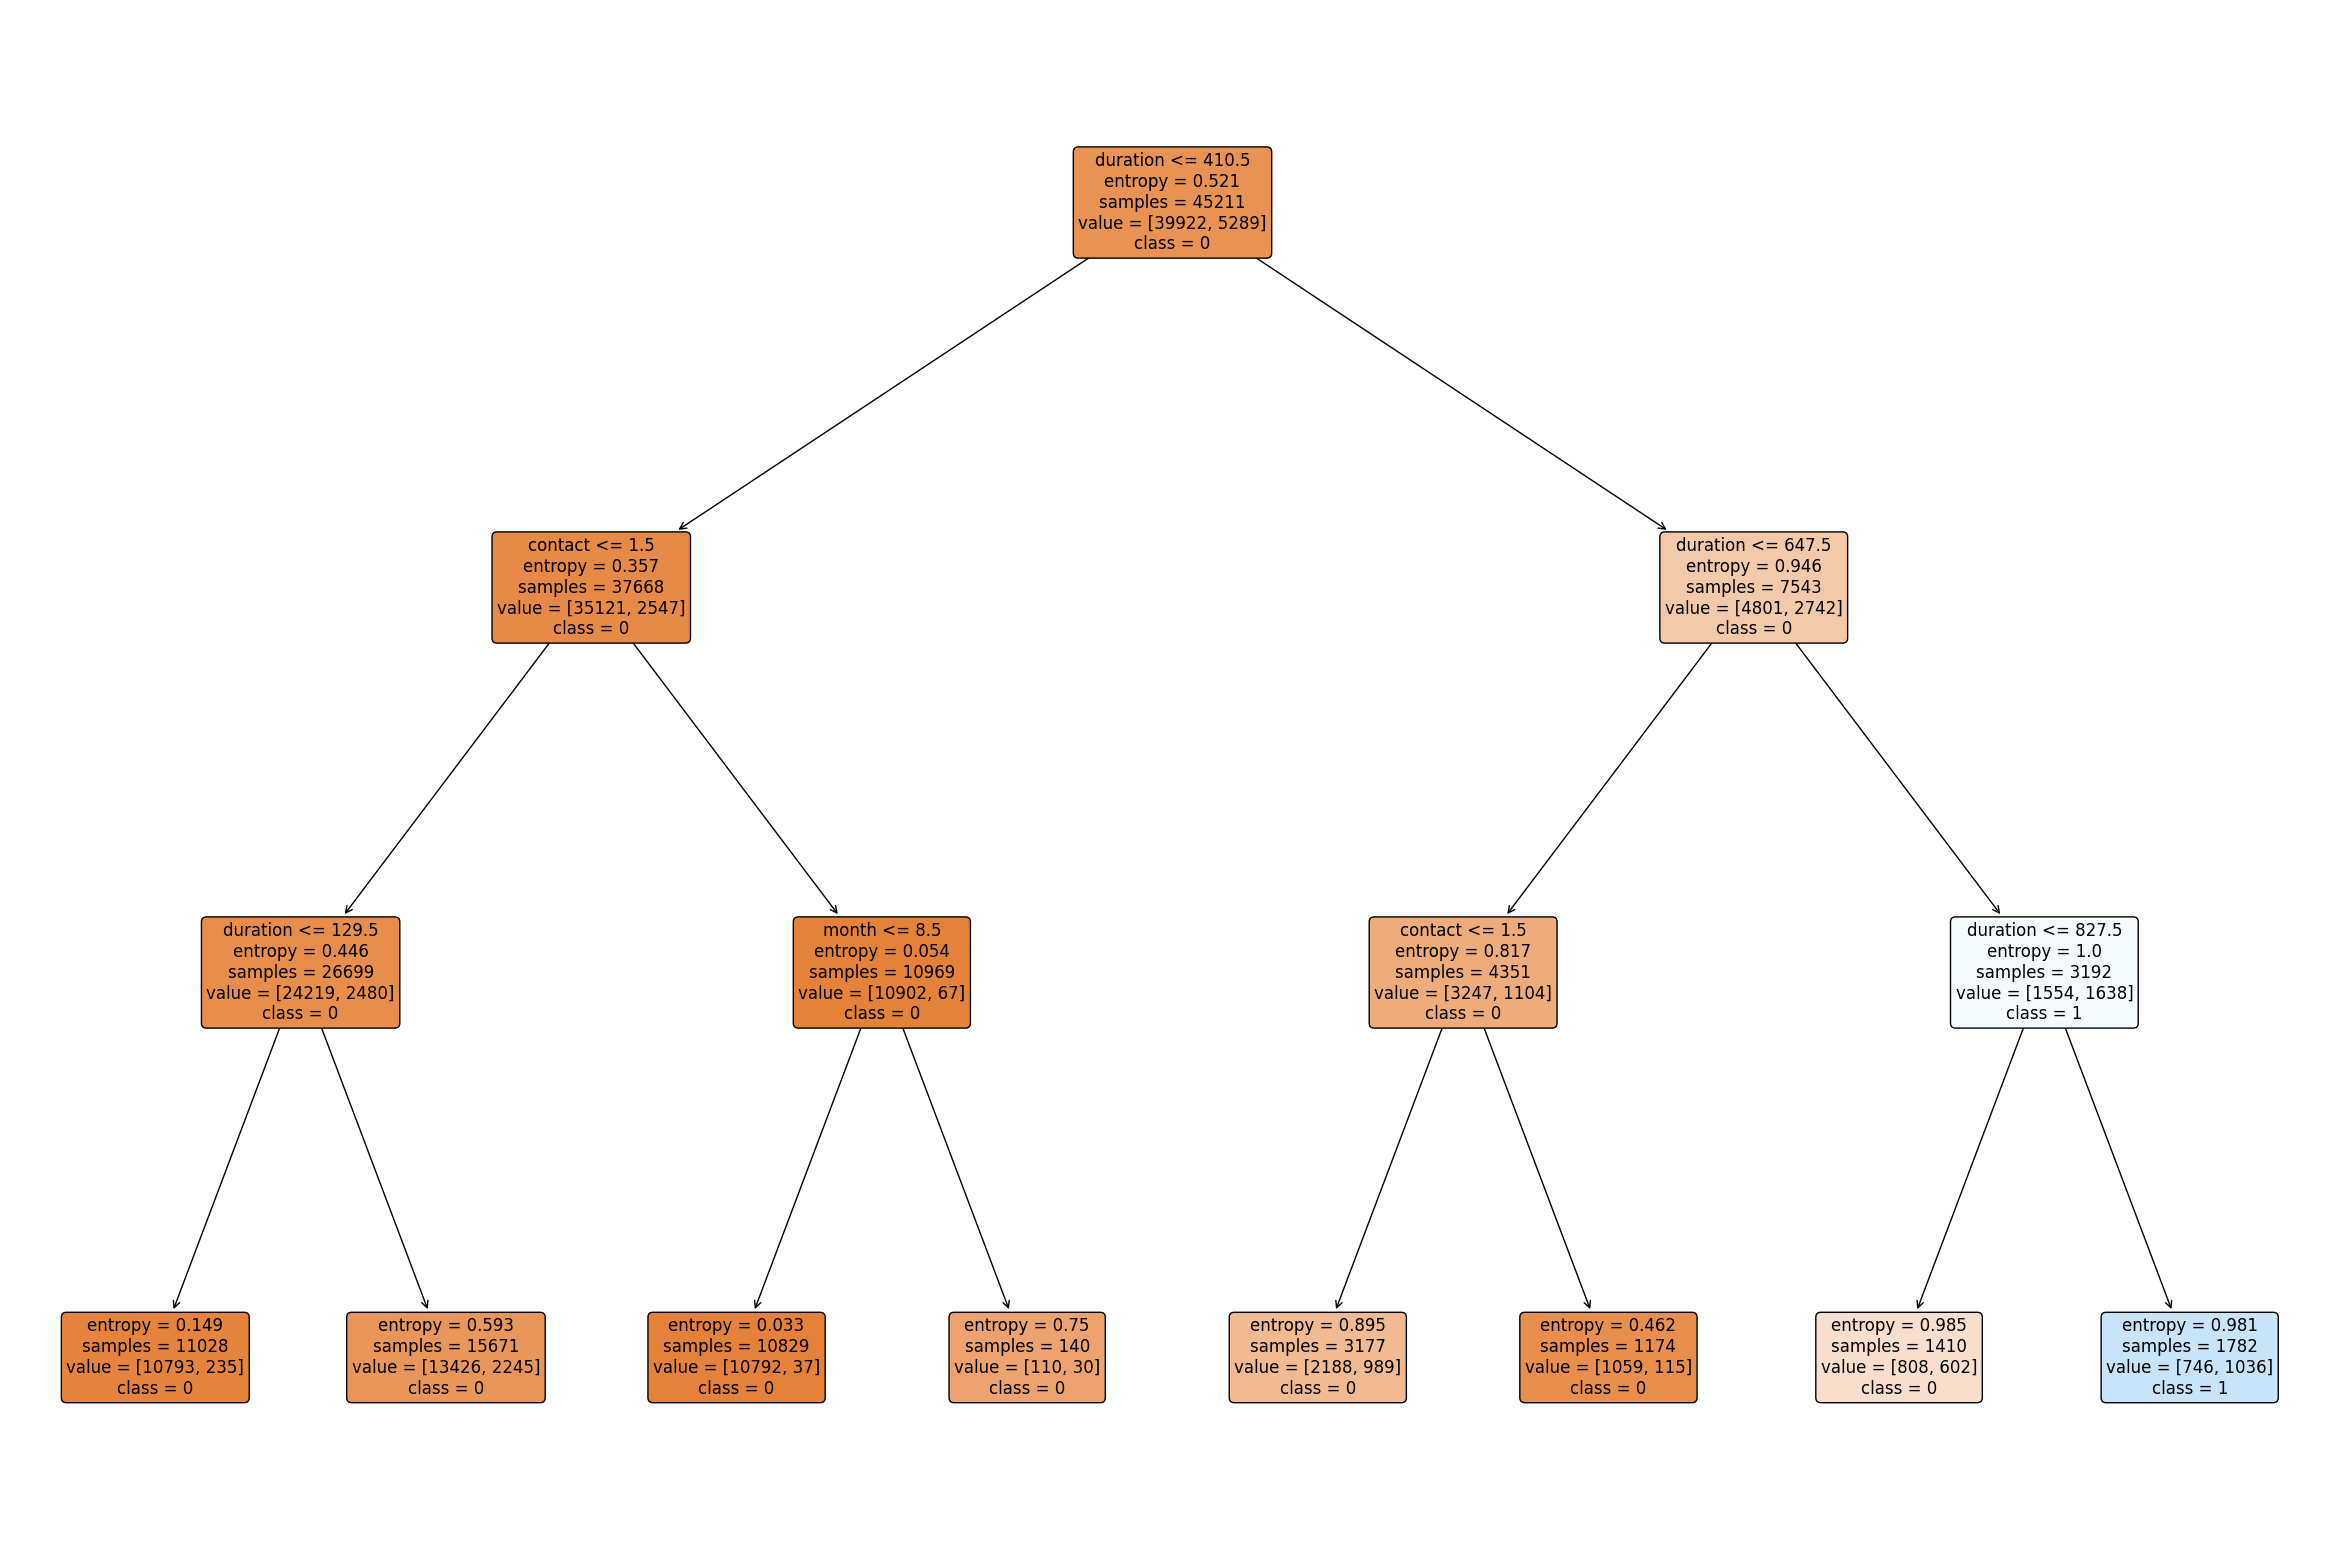

In [51]:
plt.figure(figsize = (30,20))
tree.plot_tree(model2,filled = True,rounded = True,feature_names = x_train.columns,class_names = ['0','1'],fontsize = 12)
plt.show()

# RANDOM FOREST

In [52]:
# Base Model
model3 = RandomForestClassifier(n_estimators = 100,criterion ='gini',max_depth = None,min_samples_split=2, min_samples_leaf=1,max_features='sqrt',bootstrap=True, oob_score=False)

# HYPERPARAMETER TUNING

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# From these random forest will be high , so we can go tuning to that model for to get optimum accuracy and efficiancy of the model
# The Randam Forest model has 100% accuracy,because of this also we can go for tuning.
rf_grid = {'n_estimators': np.arange(10,100,10),'criterion':['gini','entropy'],'max_depth':[None,3,5,10],'min_samples_split':np.arange(2,20,2),'min_samples_leaf':np.arange(1,20,2),'max_features':['sqrt', 'log2'],'bootstrap':[True,False],'oob_score':[True,False]}

random_grid = RandomizedSearchCV(estimator = model3,param_distributions = rf_grid,n_iter=10)



In [55]:
random_grid.fit(x_train,y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'oob_score': [True, False]})

In [56]:
pred4 = random_grid.predict(x_train)
pred5 = random_grid.predict(x1_test)


In [68]:
print('Train accuracy : ',accuracy_score(y_train,pred4))
print('Test accuracy : ',accuracy_score(y1_test,pred5))

Train accuracy :  0.8854039946030833
Test accuracy :  0.8860871488608715


# CONCLUSSION

# LOGISTIC REGRESSION

In [69]:
print('Train accuracy : ',accuracy_score(y_train,pred))
print('Test accuracy : ',accuracy_score(y1_test,pred1))

Train accuracy :  0.8860233129105749
Test accuracy :  0.8869719088697191


# DECISION TREE

In [70]:
print('Train accuracy : ',accuracy_score(y_train,pred2))
print('Test accuracy : ',accuracy_score(y1_test,pred3))

Train accuracy :  0.8894295636017784
Test accuracy :  0.8898473788984738


# RANDOM FOREST

In [71]:
print('Train accuracy : ',accuracy_score(y_train,pred4))
print('Test accuracy : ',accuracy_score(y1_test,pred5))

Train accuracy :  0.8854039946030833
Test accuracy :  0.8860871488608715


# From these conclussion we can say that the accuracy of the data is 88% for all the models